In [30]:

import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from helpers import VectorNormalizer

In [31]:
res = requests.get("https://ai-emp-fog-comp.herokuapp.com/raw-data")
response = res.json()

In [38]:
df = pd.DataFrame.from_dict(response["raw_data"])

In [39]:
df.columns

Index(['timestep_time', 'vehicle_1_speed', 'vehicle_2_speed',
       'vehicle_3_speed', 'vehicle_4_speed', 'vehicle_5_speed',
       'vehicle_6_speed', 'vehicle_7_speed', 'vehicle_8_speed',
       'vehicle_9_speed', 'vehicle_10_speed', 'vehicle_11_speed',
       'vehicle_12_speed', 'vehicle_13_speed', 'vehicle_14_speed',
       'vehicle_15_speed', 'vehicle_16_speed', 'vehicle_17_speed',
       'vehicle_1_position', 'vehicle_2_position', 'vehicle_3_position',
       'vehicle_4_position', 'vehicle_5_position', 'vehicle_6_position',
       'vehicle_7_position', 'vehicle_8_position', 'vehicle_9_position',
       'vehicle_10_position', 'vehicle_11_position', 'vehicle_12_position',
       'vehicle_13_position', 'vehicle_14_position', 'vehicle_15_position',
       'vehicle_16_position', 'vehicle_17_position'],
      dtype='object')

In [40]:
# dropping timestep_time column
df.drop(columns =  "timestep_time", inplace = True)

In [41]:
df

,vehicle_1_speed,vehicle_2_speed,vehicle_3_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed,vehicle_9_speed,vehicle_10_speed,...,vehicle_8_position,vehicle_9_position,vehicle_10_position,vehicle_11_position,vehicle_12_position,vehicle_13_position,vehicle_14_position,vehicle_15_position,vehicle_16_position,vehicle_17_position
0,643.23,362.75,186.78,99.19,55.45,30.70,18.04,5.10,476.04,551.59,...,0.00,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55
1,655.90,370.55,199.25,103.51,61.61,36.01,24.82,6.55,486.83,564.90,...,1.45,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88
2,668.23,378.11,211.16,107.05,67.78,40.62,32.47,9.50,497.09,578.71,...,2.94,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77
3,679.96,385.32,223.58,110.50,75.01,45.28,39.39,15.02,507.35,591.86,...,5.52,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75
4,692.82,393.16,235.65,113.74,81.46,49.98,46.90,22.57,517.24,604.84,...,7.55,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,18785.21,10987.21,17530.55,13886.35,9958.51,6975.33,10847.61,10493.85,15560.36,20080.52,...,7.16,10.45,12.74,11.49,3.37,11.54,4.87,7.22,3.52,10.43
1467,18797.48,10993.97,17542.32,13895.69,9965.89,6980.47,10854.97,10500.88,15570.24,20094.18,...,7.03,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.97
1468,18810.39,11001.14,17553.85,13905.24,9972.27,6985.84,10862.77,10508.60,15581.03,20107.73,...,7.72,10.79,13.55,11.60,2.61,12.27,4.70,6.60,4.18,11.26
1469,18822.92,11008.17,17565.16,13914.10,9979.05,6990.34,10870.22,10515.70,15591.24,20121.57,...,7.11,10.21,13.84,10.98,2.35,12.42,4.70,7.46,4.11,11.59


In [42]:
df.isnull().sum()

vehicle_1_speed        0
vehicle_2_speed        0
vehicle_3_speed        0
vehicle_4_speed        0
vehicle_5_speed        0
vehicle_6_speed        0
vehicle_7_speed        0
vehicle_8_speed        0
vehicle_9_speed        0
vehicle_10_speed       0
vehicle_11_speed       0
vehicle_12_speed       0
vehicle_13_speed       0
vehicle_14_speed       0
vehicle_15_speed       0
vehicle_16_speed       0
vehicle_17_speed       0
vehicle_1_position     0
vehicle_2_position     0
vehicle_3_position     0
vehicle_4_position     0
vehicle_5_position     0
vehicle_6_position     0
vehicle_7_position     0
vehicle_8_position     0
vehicle_9_position     0
vehicle_10_position    0
vehicle_11_position    0
vehicle_12_position    0
vehicle_13_position    0
vehicle_14_position    0
vehicle_15_position    0
vehicle_16_position    0
vehicle_17_position    0
dtype: int64

In [43]:
# speed
df_speed=df.iloc[:,17:]
df_speed

,vehicle_1_position,vehicle_2_position,vehicle_3_position,vehicle_4_position,vehicle_5_position,vehicle_6_position,vehicle_7_position,vehicle_8_position,vehicle_9_position,vehicle_10_position,vehicle_11_position,vehicle_12_position,vehicle_13_position,vehicle_14_position,vehicle_15_position,vehicle_16_position,vehicle_17_position
0,12.13,6.92,11.54,6.16,6.93,4.33,5.77,0.00,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55
1,12.66,7.80,12.47,4.32,6.16,5.32,6.78,1.45,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88
2,12.33,7.56,11.91,3.54,6.17,4.61,7.65,2.94,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77
3,11.73,7.21,12.41,3.44,7.24,4.65,6.92,5.52,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75
4,12.86,7.84,12.07,3.24,6.45,4.71,7.51,7.55,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,12.83,7.22,12.17,9.67,6.62,5.31,7.81,7.16,10.45,12.74,11.49,3.37,11.54,4.87,7.22,3.52,10.43
1467,12.27,6.76,11.76,9.33,7.38,5.14,7.36,7.03,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.97
1468,12.91,7.17,11.54,9.55,6.38,5.37,7.80,7.72,10.79,13.55,11.60,2.61,12.27,4.70,6.60,4.18,11.26
1469,12.53,7.03,11.31,8.87,6.78,4.50,7.45,7.11,10.21,13.84,10.98,2.35,12.42,4.70,7.46,4.11,11.59


In [44]:
# position
df_pos=df.iloc[:,:17]
df_pos

,vehicle_1_speed,vehicle_2_speed,vehicle_3_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed,vehicle_9_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed
0,643.23,362.75,186.78,99.19,55.45,30.70,18.04,5.10,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55
1,655.90,370.55,199.25,103.51,61.61,36.01,24.82,6.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44
2,668.23,378.11,211.16,107.05,67.78,40.62,32.47,9.50,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21
3,679.96,385.32,223.58,110.50,75.01,45.28,39.39,15.02,507.35,591.86,475.16,122.11,419.15,181.79,225.11,115.34,232.95
4,692.82,393.16,235.65,113.74,81.46,49.98,46.90,22.57,517.24,604.84,486.88,124.68,431.39,186.27,231.74,118.68,243.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,18785.21,10987.21,17530.55,13886.35,9958.51,6975.33,10847.61,10493.85,15560.36,20080.52,16735.93,4163.02,17634.01,7581.01,10819.13,5754.26,16258.77
1467,18797.48,10993.97,17542.32,13895.69,9965.89,6980.47,10854.97,10500.88,15570.24,20094.18,16747.63,4165.77,17645.92,7585.58,10826.09,5758.25,16269.75
1468,18810.39,11001.14,17553.85,13905.24,9972.27,6985.84,10862.77,10508.60,15581.03,20107.73,16759.24,4168.38,17658.19,7590.28,10832.69,5762.43,16281.01
1469,18822.92,11008.17,17565.16,13914.10,9979.05,6990.34,10870.22,10515.70,15591.24,20121.57,16770.22,4170.74,17670.61,7594.98,10840.15,5766.54,16292.60


In [45]:
# speed
# splitting train/test data
train_df_speed = df_speed.iloc[:1200, :]
test_df_speed = df_speed.iloc[1200:, :]

In [46]:
print(train_df.shape)
print(test_df.shape)

(1200, 17)
(271, 17)


In [47]:
# position
# splitting train/test data
train_df_pos = df_pos.iloc[:1200, :]
test_df_pos = df_pos.iloc[1200:, :]

In [48]:
print(train_df_pos.shape)
print(test_df_pos.shape)

(1200, 17)
(271, 17)


## Vector Normalization for speed

In [50]:
normalizer = VectorNormalizer()

# fit speed
speed_norms = normalizer.fit(train_df_speed.to_numpy())

speeds_df_train_array = train_df_speed.to_numpy()
speeds_df_test_array = test_df_speed.to_numpy()

# normalize train data
speeds_df_train = pd.DataFrame(normalizer.transform(speeds_df_train_array))

# # normalize test data
speeds_df_test = pd.DataFrame(normalizer.transform(speeds_df_test_array))

## Vector Normalization for speed

In [51]:
normalizer = VectorNormalizer()

# fit position
position_norms = normalizer.fit(train_df_pos.to_numpy())

positions_df_train_array = train_df_pos.to_numpy()
positions_df_test_array = test_df_pos.to_numpy()

# normalize train data
positions_df_train = pd.DataFrame(normalizer.transform(positions_df_train_array))

# # normalize test data
positions_df_test = pd.DataFrame(normalizer.transform(positions_df_test_array))

In [52]:
# prepare data to be fed into the LSTM/RNN/GRU model
def create_dataset(data, steps):
  features, labels = [], []
  for i in range(len(data)-steps):
    data_seq = data[i: i+steps, :]
    features.append(data_seq)

    seq_label = data[i+steps, :]
    labels.append(seq_label)

  return np.array(features), np.array(labels)

In [56]:
# speed
TIME_STEPS = 2

train_features_speed, train_labels_speed = create_dataset(speeds_df_train.to_numpy(), TIME_STEPS)
test_features_speed, test_labels_speed = create_dataset(speeds_df_test.to_numpy(), TIME_STEPS)

In [57]:
# position
train_features_pos, train_labels_pos = create_dataset(positions_df_train.to_numpy(), TIME_STEPS)
test_features_pos, test_labels_pos = create_dataset(positions_df_test.to_numpy(), TIME_STEPS)

In [88]:
# speed
from keras.backend import dropout
model_s = keras.models.Sequential()
model_s.add(keras.layers.LSTM(17, input_shape=(train_features_speed.shape[1], train_features_speed.shape[2]),activation="relu" ,return_sequences=True))
model_s.add(keras.layers.LSTM(4))
model_s.add(keras.layers.Dense(17))

model_s.compile(optimizer='adam', loss=['mse'], metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])

In [89]:
# position
from keras.backend import dropout
model_p = keras.models.Sequential()
model_p.add(keras.layers.LSTM(17, input_shape=(train_features_pos.shape[1], train_features_pos.shape[2]),activation="relu" ,return_sequences=True))
model_p.add(keras.layers.LSTM(4))
model_p.add(keras.layers.Dense(17))

model_p.compile(optimizer='adam', loss=['mse'], metrics=['mean_absolute_error'])

In [90]:
# fitting model for speed
history_s = model_s.fit(train_features_speed, train_labels_speed, batch_size=64, epochs=120, shuffle=False, validation_split=.12)

Epoch 1/120
17/17 [==============================] - 4s 51ms/step - loss: 4.4633e-04 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 70.4670 - val_loss: 1.3003e-04 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 37.1501
Epoch 2/120
17/17 [==============================] - 0s 9ms/step - loss: 4.7930e-05 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.3384 - val_loss: 8.4672e-06 - val_mean_absolute_error: 0.0024 - val_mean_absolute_percentage_error: 8.4935
Epoch 3/120
17/17 [==============================] - 0s 8ms/step - loss: 6.7814e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.4290 - val_loss: 5.8494e-06 - val_mean_absolute_error: 0.0019 - val_mean_absolute_percentage_error: 6.8417
Epoch 4/120
17/17 [==============================] - 0s 7ms/step - loss: 5.1969e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 6.3560 - val_loss: 3.5158e-06 - val_mean_absolute_error: 0.0015 - val_mean_ab

Epoch 33/120
17/17 [==============================] - 0s 7ms/step - loss: 3.4198e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9305 - val_loss: 3.0878e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 4.7341
Epoch 34/120
17/17 [==============================] - 0s 7ms/step - loss: 3.4200e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9307 - val_loss: 3.0888e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 4.7354
Epoch 35/120
17/17 [==============================] - 0s 5ms/step - loss: 3.4202e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9307 - val_loss: 3.0898e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 4.7368
Epoch 36/120
17/17 [==============================] - 0s 6ms/step - loss: 3.4203e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9308 - val_loss: 3.0909e-06 - val_mean_absolute_error: 0.0013 - val_mean_ab

17/17 [==============================] - 0s 5ms/step - loss: 3.4221e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9298 - val_loss: 3.1016e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.7506
Epoch 65/120
17/17 [==============================] - 0s 5ms/step - loss: 3.4223e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9299 - val_loss: 3.1017e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.7508
Epoch 66/120
17/17 [==============================] - 0s 5ms/step - loss: 3.4226e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9300 - val_loss: 3.1019e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.7510
Epoch 67/120
17/17 [==============================] - 0s 5ms/step - loss: 3.4228e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9301 - val_loss: 3.1020e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percen

Epoch 96/120
17/17 [==============================] - 0s 6ms/step - loss: 3.4345e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9357 - val_loss: 3.1100e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.7594
Epoch 97/120
17/17 [==============================] - 0s 7ms/step - loss: 3.4350e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9359 - val_loss: 3.1103e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.7597
Epoch 98/120
17/17 [==============================] - 0s 6ms/step - loss: 3.4356e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9362 - val_loss: 3.1106e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 4.7600
Epoch 99/120
17/17 [==============================] - 0s 6ms/step - loss: 3.4361e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 4.9364 - val_loss: 3.1109e-06 - val_mean_absolute_error: 0.0014 - val_mean_ab

In [91]:
# fitting model for position
history_p = model_p.fit(train_features_pos, train_labels_pos, batch_size=64, epochs=120, shuffle=False, validation_split=.12)

Epoch 1/120
17/17 [==============================] - 3s 42ms/step - loss: 2.1681e-04 - mean_absolute_error: 0.0130 - val_loss: 6.5122e-04 - val_mean_absolute_error: 0.0249
Epoch 2/120
17/17 [==============================] - 0s 5ms/step - loss: 1.3945e-04 - mean_absolute_error: 0.0102 - val_loss: 4.2642e-04 - val_mean_absolute_error: 0.0205
Epoch 3/120
17/17 [==============================] - 0s 5ms/step - loss: 1.6631e-04 - mean_absolute_error: 0.0112 - val_loss: 4.5477e-04 - val_mean_absolute_error: 0.0212
Epoch 4/120
17/17 [==============================] - 0s 5ms/step - loss: 1.5676e-04 - mean_absolute_error: 0.0109 - val_loss: 4.6448e-04 - val_mean_absolute_error: 0.0214
Epoch 5/120
17/17 [==============================] - 0s 5ms/step - loss: 1.4988e-04 - mean_absolute_error: 0.0107 - val_loss: 4.5534e-04 - val_mean_absolute_error: 0.0211
Epoch 6/120
17/17 [==============================] - 0s 5ms/step - loss: 1.4553e-04 - mean_absolute_error: 0.0105 - val_loss: 4.3974e-04 - val_m

Epoch 48/120
17/17 [==============================] - 0s 5ms/step - loss: 3.0083e-07 - mean_absolute_error: 4.0580e-04 - val_loss: 1.1572e-06 - val_mean_absolute_error: 9.6538e-04
Epoch 49/120
17/17 [==============================] - 0s 5ms/step - loss: 4.6527e-07 - mean_absolute_error: 5.0980e-04 - val_loss: 1.1484e-06 - val_mean_absolute_error: 9.7189e-04
Epoch 50/120
17/17 [==============================] - 0s 5ms/step - loss: 6.4969e-07 - mean_absolute_error: 6.0830e-04 - val_loss: 1.2320e-06 - val_mean_absolute_error: 0.0010
Epoch 51/120
17/17 [==============================] - 0s 5ms/step - loss: 7.2426e-07 - mean_absolute_error: 6.5084e-04 - val_loss: 1.4211e-06 - val_mean_absolute_error: 0.0011
Epoch 52/120
17/17 [==============================] - 0s 6ms/step - loss: 5.5073e-07 - mean_absolute_error: 5.7513e-04 - val_loss: 1.4996e-06 - val_mean_absolute_error: 0.0011
Epoch 53/120
17/17 [==============================] - 0s 7ms/step - loss: 2.4722e-07 - mean_absolute_error: 3.98

17/17 [==============================] - 0s 6ms/step - loss: 4.3479e-07 - mean_absolute_error: 5.1133e-04 - val_loss: 6.8594e-07 - val_mean_absolute_error: 7.2601e-04
Epoch 94/120
17/17 [==============================] - 0s 6ms/step - loss: 6.4384e-07 - mean_absolute_error: 6.1753e-04 - val_loss: 6.3405e-07 - val_mean_absolute_error: 6.9258e-04
Epoch 95/120
17/17 [==============================] - 0s 6ms/step - loss: 8.1475e-07 - mean_absolute_error: 6.9634e-04 - val_loss: 6.4209e-07 - val_mean_absolute_error: 6.9307e-04
Epoch 96/120
17/17 [==============================] - 0s 6ms/step - loss: 8.3842e-07 - mean_absolute_error: 7.0879e-04 - val_loss: 7.2177e-07 - val_mean_absolute_error: 7.3160e-04
Epoch 97/120
17/17 [==============================] - 0s 6ms/step - loss: 6.3947e-07 - mean_absolute_error: 6.1384e-04 - val_loss: 8.6269e-07 - val_mean_absolute_error: 7.9773e-04
Epoch 98/120
17/17 [==============================] - 0s 6ms/step - loss: 3.0385e-07 - mean_absolute_error: 4.144

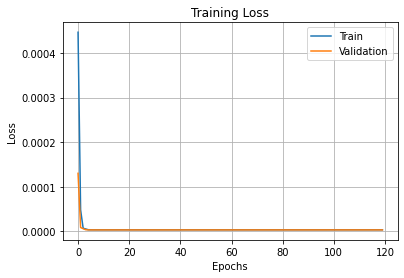

In [92]:
# speed
plt.plot(history_s.history['loss'], label='Train')
plt.plot(history_s.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

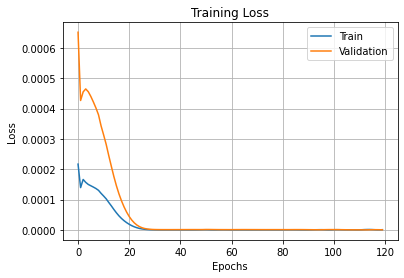

In [93]:
# position
plt.plot(history_p.history['loss'], label='Train')
plt.plot(history_p.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

In [94]:
# speed
# predicting on test data
prediction_speed = model_s.predict(test_features_speed)
prediction_speed

array([[0.0287012 , 0.02892805, 0.02885207, ..., 0.02886704, 0.02860712,
        0.02870455],
       [0.02869425, 0.02896386, 0.02882975, ..., 0.02887776, 0.02860499,
        0.02867074],
       [0.02869779, 0.02894461, 0.02884327, ..., 0.0288716 , 0.02860509,
        0.02868915],
       ...,
       [0.0287108 , 0.02888719, 0.02886681, ..., 0.02885445, 0.0286099 ,
        0.02873648],
       [0.02871466, 0.02887036, 0.0288636 , ..., 0.02884926, 0.02861112,
        0.02874278],
       [0.02872303, 0.02884775, 0.02885803, ..., 0.02884318, 0.02861675,
        0.02875514]], dtype=float32)

In [95]:
# position
# predicting on test data
prediction_pos = model_p.predict(test_features_pos)
prediction_pos

array([[0.04840188, 0.047951  , 0.04899061, ..., 0.04833338, 0.04795856,
        0.04810898],
       [0.0484374 , 0.04798437, 0.04902411, ..., 0.04836311, 0.04798813,
        0.04814203],
       [0.04847299, 0.04801787, 0.04905769, ..., 0.04839309, 0.04801817,
        0.04817552],
       ...,
       [0.05749321, 0.05645886, 0.05762095, ..., 0.05613752, 0.05580825,
        0.05673343],
       [0.05752703, 0.05649061, 0.05765319, ..., 0.05616698, 0.0558381 ,
        0.056766  ],
       [0.05756073, 0.05652224, 0.05768533, ..., 0.05619634, 0.05586783,
        0.05679842]], dtype=float32)

In [96]:
# speed
cols_s=df_speed.columns
cols_s=list(cols_s)

In [97]:
# position
cols_p=df_pos.columns
cols_p=list(cols_p)

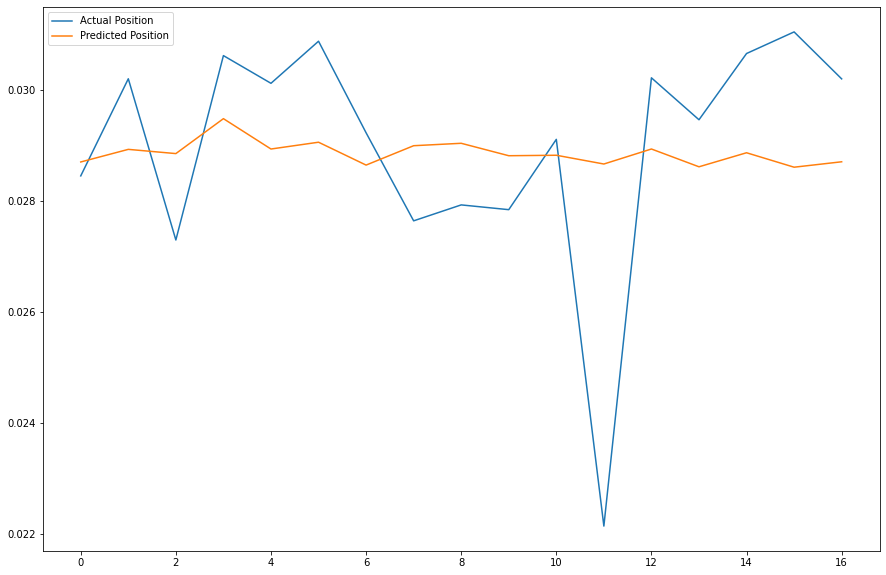

In [99]:
# speed graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels[0, :17], label='Actual Position');
plt.plot(prediction_speed[0, :17], label='Predicted Position');
plt.legend()

In [100]:
model_s.save('speed_lstm.h5')

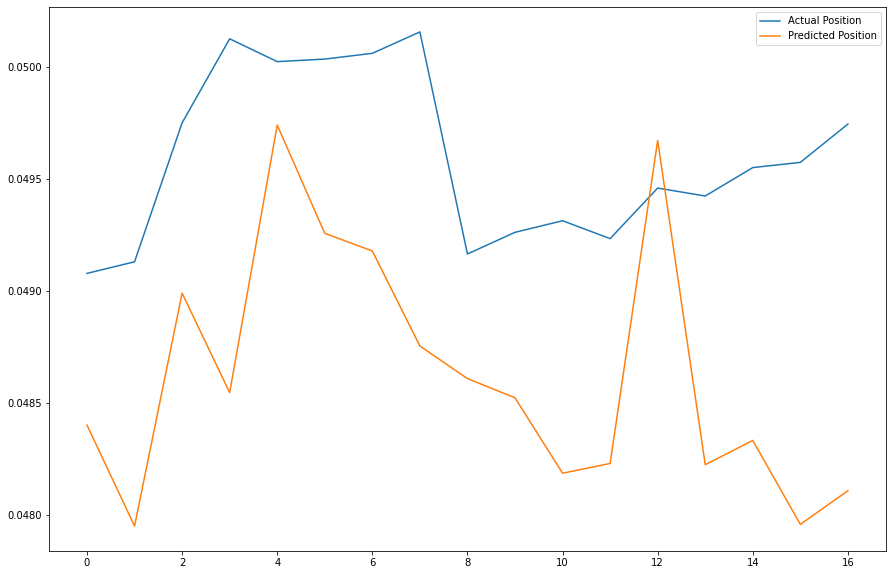

In [101]:
# position graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels_pos[0, :17], label='Actual Position');
plt.plot(prediction_pos[0, :17], label='Predicted Position');
plt.legend()

In [102]:
model_p.save('position_lstm.h5')